

1.   What is the relationship between Tesla's spending on research and development and its net income?
2.    Is there a lagged effect?
3. Does r&d spending influence the stock price?
 

Experimental design:

In this experiment, we will answer the questions asked above by constructing several neural networks to determine the relationships between the input and output variables.

Neural networks to be constructed:


1.   input = today's research and development expenses. output = today's net income
2.   input = last quarter's research and development expenses. output = net income
3. input = research and development expenses from five years ago. output = net income
4. cumulative research and development expenses from 5 years ago. output = net income





In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

tf.get_logger().setLevel('ERROR')

#download data
df = pd.read_csv('/content/TSLA_quarterly_financials.csv')

#clean data
df = df.T[[6,18,44]].drop(labels=['Name','ttm'],axis=0).astype(float)

#name cols
df.columns =['rnd_0','ni','price']


df.head()

,rnd_0,ni,price
3/31/2022,865000000.0,3.318000e+09,962.0
12/31/2021,740000000.0,2.321000e+09,1105.0
9/30/2021,611000000.0,1.618000e+09,733.0
6/30/2021,576000000.0,1.142000e+09,671.0
3/31/2021,666000000.0,4.380000e+08,712.0


In [ ]:
#create lagged r&d and cumulative r&d columns

df['rnd_1'] = df['rnd_0'].shift(-1)
df['rnd_10'] = df['rnd_0'].shift(-10)
df['rnd_20'] = df['rnd_0'].shift(-20)
df = df.iloc[::-1]
#df['rnd_cs'] = df['rnd_0'].cumsum()

df = df.pct_change()
#df

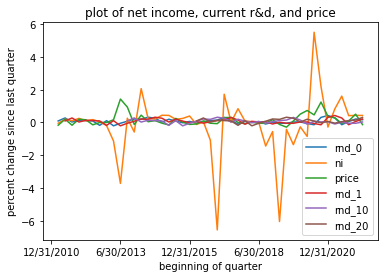

In [ ]:
#plot data to see if there may be a relationship

df.plot(xlabel = 'beginning of quarter',\
                   ylabel = 'percent change since last quarter',\
                   title = 'plot of net income, current r&d, and price');

In [ ]:
#make the dataframes for each experiment

ex1 = ex2 = ex3 = ex4 = ex5 = ex6 = ex7 = ex8 = pd.DataFrame()

exp = {1:ex1 , 2:ex2, 3:ex3, 4:ex4, 5:ex5, 6:ex6, 7:ex7, 8:ex8}
xnames = ['rnd_0','rnd_1','rnd_10','rnd_20','rnd_0','rnd_1','rnd_10','rnd_20']
ynames = ['ni','ni','ni','ni','price','price','price','price']

def make_exp(experiments,xname,yname):
  i=1
  while i <= len(xnames):
    exp[i]['x'] = df[xname[i-1]]
    exp[i]['y'] = df[yname[i-1]]
    exp[i] = exp[i].dropna()
    i+=1

make_exp(exp,xnames,ynames)

In [ ]:
#define a function that will accept verious parameters and give a graph of the relationship between X and Y
# Hidden Layers
#make titles internally

# loss_plots = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8}
# result_plots = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8}

model_storage = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8}
history_storage = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8}

def experiment(neurons, learningrate, epochs_please, x,y,xlabel='x',ylabel='y',title='title',iter=0):

  title_ = f'{xlabel} vs {ylabel}'

  h1 = tf.keras.layers.Dense(units=neurons, activation='relu', input_shape=[1])
  h2 = tf.keras.layers.Dense(units=neurons, activation='relu')
  h3 = tf.keras.layers.Dense(units=1)

  # Stack Input, Hidden, and Output Layers
  model = tf.keras.Sequential([h1, h2, h3])

  # Determine the Optimizer and Loss Function
  loss = 'mse'
  optimizer = 'Adam'

  #learning rate
  learning_rate = learningrate #0.001
  optimizer = tf.keras.optimizers.Adam(learning_rate)

  # Compile the ML model and train it
  model.compile(loss=loss, optimizer=optimizer)
  history = model.fit(x, y, epochs=epochs_please, verbose=False)

  model_storage[iter+1]=model
  history_storage[iter+1]=history

In [ ]:
#run the above function for all experiments
#experiment(neur,learn,epoc, , ,xnames,ynames,)
neur = [64]*8
learn = [0.001]*8
epoc = [65000]*8

for i in range(len(xnames)):

  experiment(neur[i],learn[i], epoc[i], exp[i+1]['x'],exp[i+1]['y'],xnames[i],ynames[i],'title',i)



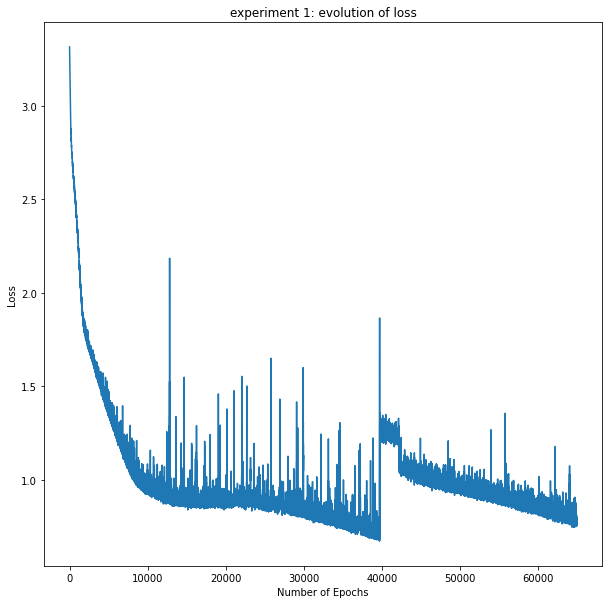

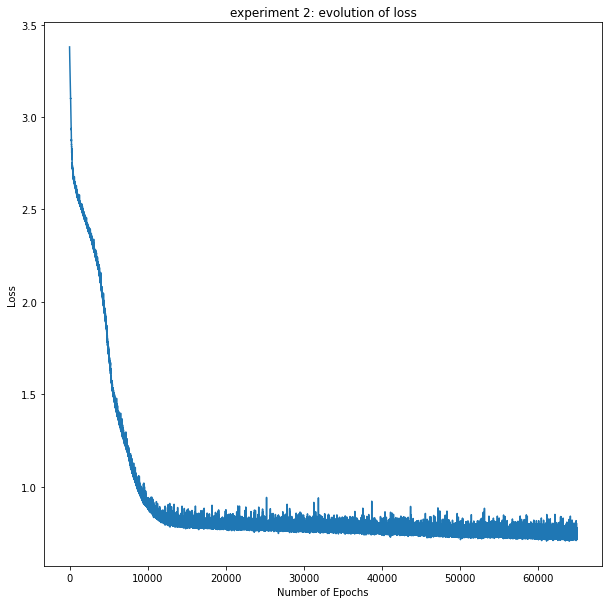

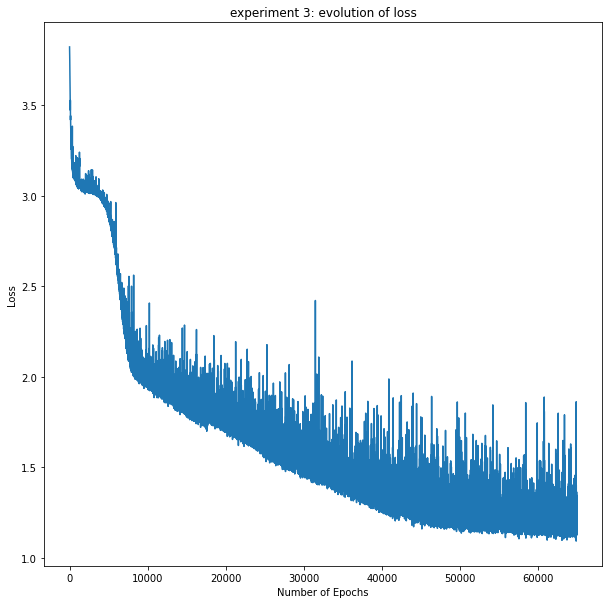

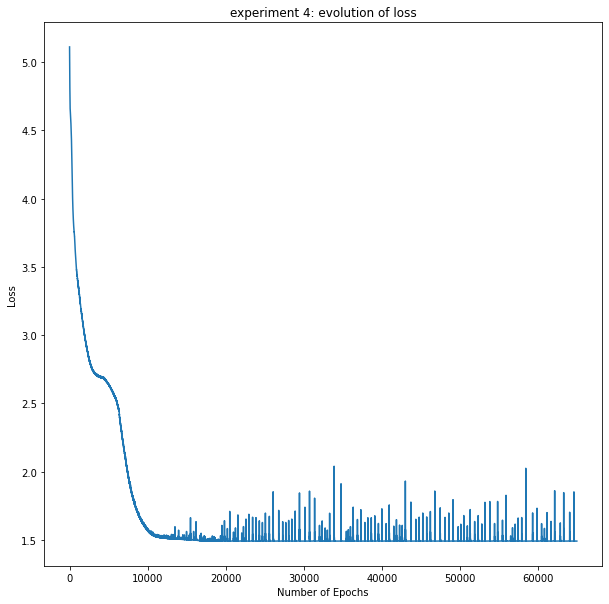

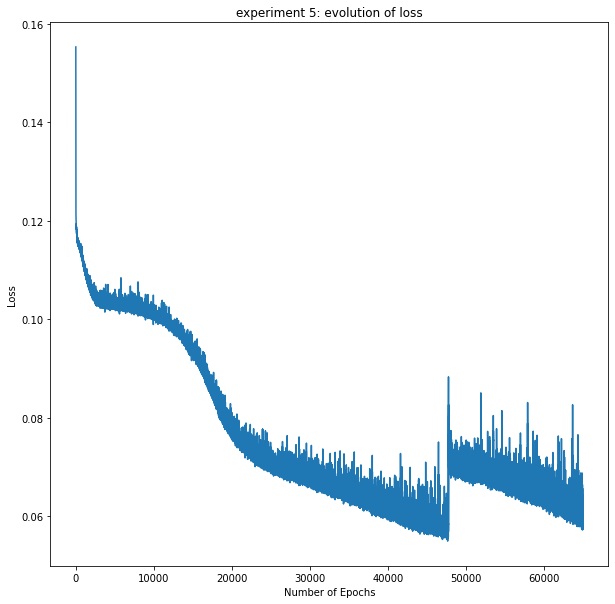

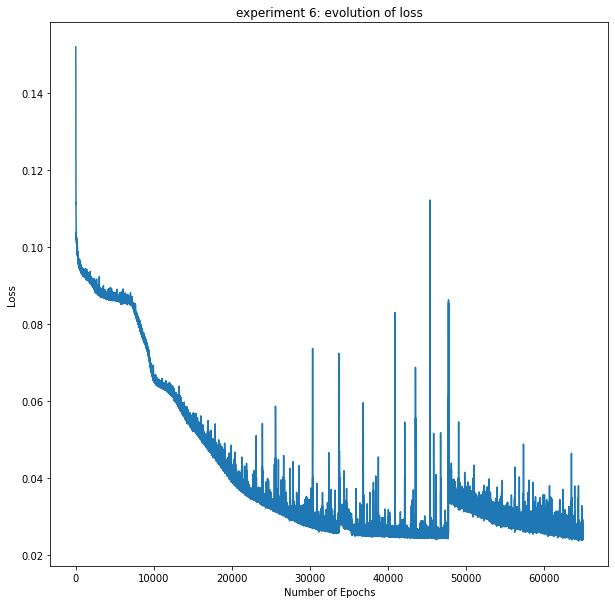

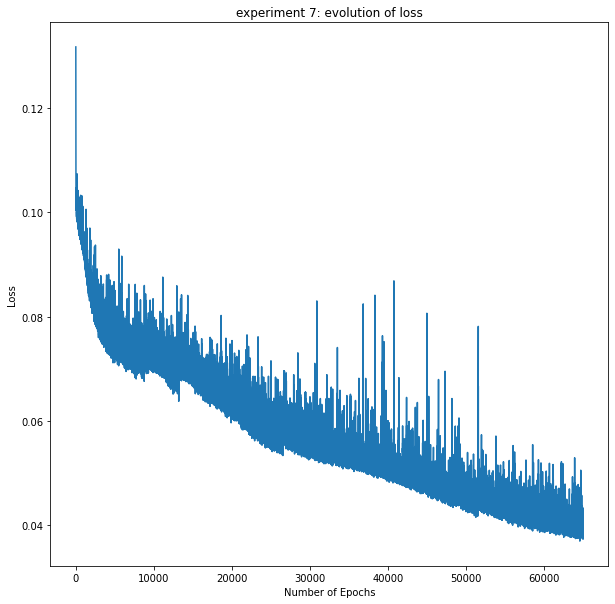

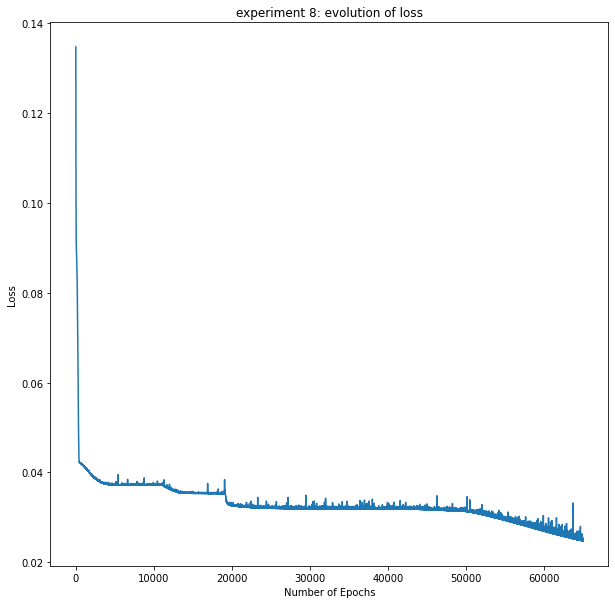

In [ ]:
#experiment(64,0.001, 60000, exp[1]['x'],exp[1]['y'],'x','y','title')

for i in range(len(xnames)):
  #plots
  plt.figure(figsize=(10,10))
  plt.plot(history_storage[i+1].history['loss'])
  plt.title(f'experiment {i+1}: evolution of loss')
  plt.xlabel('Number of Epochs')
  plt.ylabel('Loss');

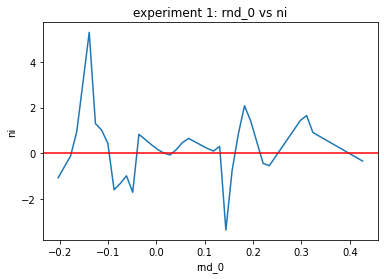

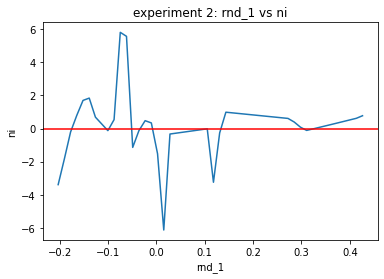

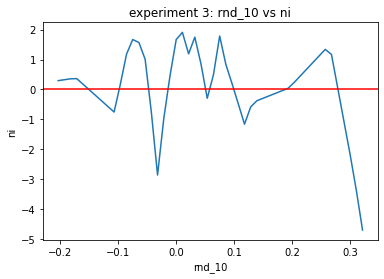

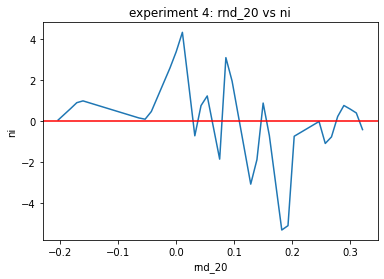

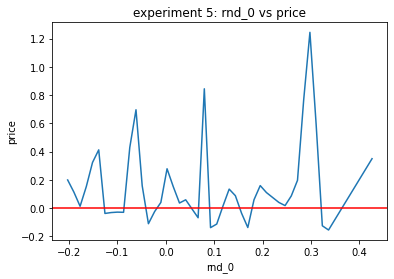

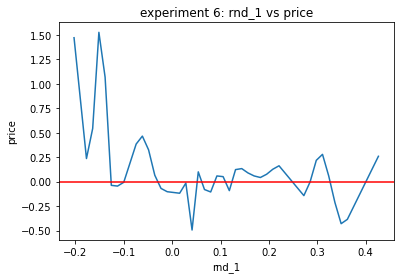

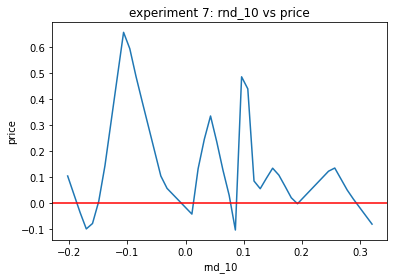

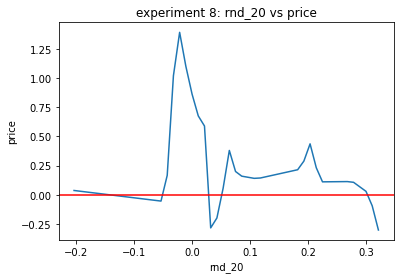

In [ ]:
def plot_me(x,xlabel,ylabel,model,iter):
  #this function plots the predicted output (Y) against the input (X)
  #we pass X into this function so that we know what values to constrain our graph to. out of sample predictions are not going to be useful
  title_ = f'experiment {i+1}: {xlabel} vs {ylabel}'

  max = x.max()
  min = x.min()

  X = np.linspace(max,min,50)
  Y = model.predict(X)[:,0]

  fig = plt.figure()

  plt.plot(X,Y)
  plt.axhline(y=0,color='r')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title_);

for i in range(len(xnames)):

  plot_me(exp[i+1]['x'],xnames[i],ynames[i],model_storage[i+1],i)
